# Trabajo Pr√°ctico: Modelado Comparativo en Miner√≠a de Datos (Clasificaci√≥n)

En este trabajo vamos a analizar un dataset que contiene informaci√≥n sobre h√°bitos de estudiantes universitarios y su rendimiento acad√©mico. El objetivo de este notebook es aplicar t√©cnicas de miner√≠a de datos para construir un modelo de clasificaci√≥n que permita predecir una variable categ√≥rica a partir del resto de los datos.

## 1. Descripci√≥n General del Problema de Clasificaci√≥n

En este trabajo abordamos un problema de clasificaci√≥n utilizando un dataset que recopila informaci√≥n sobre estudiantes universitarios, sus h√°bitos, condiciones personales y estilos de vida. El prop√≥sito del an√°lisis es predecir una categor√≠a de rendimiento acad√©mico a partir de esas variables.

---

### Resumen del Dataset

El conjunto de datos contiene 10,000 registros y 16 columnas. Incluye variables num√©ricas (como horas de estudio, sue√±o y asistencia) y categ√≥ricas (como g√©nero, calidad de dieta, tipo de conexi√≥n a internet, entre otras).  
La variable original `exam_score` fue transformada en una variable categ√≥rica llamada `exam_performance`, con tres clases: **Bajo**, **Medio** y **Alto**.

---

### Objetivo del An√°lisis

El objetivo es construir modelos de clasificaci√≥n que permitan predecir el nivel de rendimiento acad√©mico (`exam_performance`) de los estudiantes. Esto implica clasificar a cada estudiante en una de tres categor√≠as en funci√≥n de sus caracter√≠sticas personales y h√°bitos.

---

### Justificaci√≥n del Dataset

Este dataset es adecuado para aplicar t√©cnicas de clasificaci√≥n por los siguientes motivos:

- La variable objetivo ha sido categorizada en tres clases balanceadas de forma razonable.
- Incluye tanto variables num√©ricas como categ√≥ricas, lo que permite evaluar distintos tipos de modelos de clasificaci√≥n.
- No contiene valores nulos ni duplicados tras el preprocesamiento.
- La cantidad de observaciones (10,000 registros) permite construir, entrenar y validar modelos con consistencia.

---

En las secciones siguientes se explorar√°n distintas t√©cnicas de clasificaci√≥n, y se evaluar√° su rendimiento utilizando m√©tricas como accuracy, matriz de confusi√≥n y reporte de clasificaci√≥n.

## Importaci√≥n de librerias

Antes de empezar, importamos todas las librer√≠as que vamos a necesitar para el an√°lisis, la visualizaci√≥n y el modelado.


In [44]:
# Importamos las librer√≠as

import pandas as pd  # para trabajar con datos en forma de tabla
import numpy as np   # para operaciones num√©ricas

from scipy.stats import f_oneway   # para realizar pruebas estad√≠sticas ANOVA entre grupos

import matplotlib.pyplot as plt  # para hacer gr√°ficos
import seaborn as sns            # para gr√°ficos m√°s completos

from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split  # para dividir en train y test
from sklearn.decomposition import PCA  # para reducci√≥n de dimensionalidad
from sklearn.feature_selection import SelectKBest, f_classif  # para seleccionar las variables num√©ricas m√°s relevantes en clasificaci√≥n

# Modelos de clasificaci√≥n
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression            # modelo de regresi√≥n log√≠stica
from sklearn.tree import DecisionTreeClassifier                # clasificador tipo √°rbol de decisi√≥n
from sklearn.ensemble import RandomForestClassifier            # clasificador de bosque aleatorio
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # m√©tricas de evaluaci√≥n


# M√©tricas para clasificaci√≥n
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecci√≥n de variables (opcional seg√∫n an√°lisis)
from sklearn.feature_selection import SelectKBest, chi2

## Carga del dataset

Trabajamos con un archivo llamado `student_habits_performance.csv`, que contiene informaci√≥n sobre h√°bitos de estudiantes y su rendimiento acad√©mico.

In [45]:
# Cargamos el nuevo archivo CSV (delimitado por comas)
df = pd.read_csv('student_habits_performance_2.csv')


## Resumen general del dataset y caracter√≠sticas

En esta secci√≥n presentamos un resumen inicial para entender mejor la estructura y calidad del dataset:

In [46]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Informaci√≥n general del dataset
# ========================
print("3. Informaci√≥n general del dataset")
df.info()
print("-" * 50)

1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

--------------------------------------------------
3. Informaci√≥n general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_l

In [47]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categor√≠as √∫nicas por variable categ√≥rica
# ========================
print("6. Categor√≠as √∫nicas por cada variable categ√≥rica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categor√≠as):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


Valores nulos
parental_education_level            952

--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categor√≠as √∫nicas por cada variable categ√≥rica

 student_id (1000 categor√≠as):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categor√≠as):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categor√≠as):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categor√≠as):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categor√≠as):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, 

A partir del an√°lisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar t√©cnicas de clasificaci√≥n de forma robusta.

- **Tipos de variables:** se identifican variables num√©ricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categ√≥ricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinaci√≥n favorece el uso de diferentes tipos de modelos y t√©cnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores l√≥gicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optar√° por imputarlos con una categor√≠a adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categor√≠as √∫nicas:** se revisaron todas las variables categ√≥ricas:
  - `student_id`: contiene 10000 valores √∫nicos (uno por estudiante), por lo tanto, no ser√° √∫til como predictor y ser√° eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un n√∫mero reducido de categor√≠as y est√°n listas para ser codificadas posteriormente.

## Tratamiento Inicial de los Datos (Preprocesamiento B√°sico)

### a) Eliminaci√≥n de columna no informativa: `student_id`

La columna `student_id` contiene identificadores √∫nicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relaci√≥n directa con el rendimiento acad√©mico, se procede a eliminarla del dataset.

In [48]:
df.drop(columns=["student_id"], inplace=True)

### b) Imputaci√≥n de valores nulos

Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categor√≠a `"No declarado"`, dejando expl√≠cito que dicha informaci√≥n no fue proporcionada.


In [49]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

### c) Transformaci√≥n de la variable objetivo - Clasificaci√≥n - 

Como se trabajar√° con modelos de clasificaci√≥n, se transforma la variable continua `exam_score` en una variable categ√≥rica denominada `exam_performance`, con tres clases:

- **Bajo**: score < 50  
- **Medio**: 50 ‚â§ score < 80  
- **Alto**: score ‚â• 80

Esta nueva variable ser√° la que intentaremos predecir mediante distintos modelos de clasificaci√≥n.

In [50]:
# Crear variable categ√≥rica de clasificaci√≥n: exam_performance
def clasificar_rendimiento(score):
    if score < 50:
        return "Bajo"
    elif score < 80:
        return "Medio"
    else:
        return "Alto"

df["exam_performance"] = df["exam_score"].apply(clasificar_rendimiento)

## Dataset Preprocesado

In [51]:
# 1. Primeras filas para ver  la eliminaci√≥n de la columna no imformativa student_id y la transformaci√≥n de la variable objetivo
print("1. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# ========================
# 2. Valores nulos por columna
# ========================
print("2. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)



1. Primeras filas del dataset actualizado


age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

  exam_performance  
0            Medio  
1             Alto  
2             Bajo  
3             Bajo  
4            Medio

--------------------------------------------------
2. Valores nulos por columna
No se encontraron valores nulos.
--------------------------------------------------


### Revisi√≥n del Dataset Preprocesado

Columnas modificadas o eliminadas:

Se elimin√≥ la columna student_id, considerada no informativa para el an√°lisis.

Se imputaron los valores nulos de parental_education_level con la categor√≠a "No declarado", aunque en el dataset final ya no quedaron valores nulos visibles.

Valores nulos restantes:

No se encontraron valores nulos en ninguna de las columnas del dataset, lo que indica un tratamiento correcto en la imputaci√≥n.

Primer vistazo a los datos:

Las primeras filas del dataset muestran un formato limpio, sin identificadores innecesarios.

Las columnas presentan valores coherentes y listos para el an√°lisis posterior.



## 2. An√°lisis Exploratorio de Datos (EDA)

### 2.1 Estad√≠sticas descriptivas generales

Se analiza un resumen estad√≠stico de las variables num√©ricas del dataset, junto con el conteo de categor√≠as presentes en las variables cualitativas.

In [52]:
# Resumen de variables num√©ricas
df.describe().style\
    .set_caption("Estad√≠sticas Descriptivas de Variables Num√©ricas")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)

Este resumen estad√≠stico permite observar la escala y dispersi√≥n de las variables num√©ricas en el dataset. Podemos ver que las medias, medianas y rangos son razonables, y que no existen valores extremos evidentes que requieran correcci√≥n inmediata.

### 2.2 Distribuci√≥n de la variable objetivo `exam_performance`

La variable objetivo `exam_performance` fue generada a partir de `exam_score` y representa tres niveles de rendimiento: **Bajo**, **Medio** y **Alto**.  
Se analiza su distribuci√≥n para verificar el equilibrio entre clases.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_17184\1470261739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="exam_performance",palette="BuGn_r")


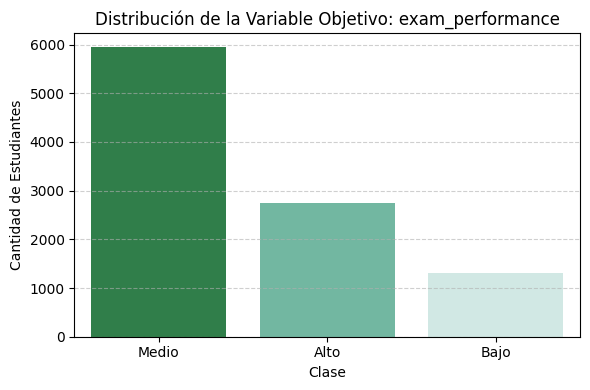

In [53]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="exam_performance",palette="BuGn_r")
plt.title("Distribuci√≥n de la Variable Objetivo: exam_performance")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tabla con conteo y porcentaje
target_counts = df["exam_performance"].value_counts()
target_percent = round(df["exam_performance"].value_counts(normalize=True) * 100, 2)

summary_df = pd.DataFrame({
    "Cantidad": target_counts,
    "Porcentaje (%)": target_percent
})

summary_df.style.set_caption(" Distribuci√≥n de Clases en 'exam_performance'")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)


 **An√°lisis**
 
La distribuci√≥n de clases en la variable exam_performance muestra un predominio de la clase "Medio", seguido por "Alto" y "Bajo". Aunque hay cierto desbalance, especialmente con la clase "Bajo", el dataset sigue siendo utilizable sin necesidad inmediata de t√©cnicas de balanceo.

La tabla confirma visualmente la distribuci√≥n observada en el gr√°fico. Se puede considerar el uso de m√©tricas como f1-score o estrategias como SMOTE si el rendimiento en modelos se ve afectado por este desbalance.

### 2.3 Visualizaci√≥n de distribuciones de variables

Se analizan las distribuciones de las variables predictoras num√©ricas mediante histogramas, con el fin de identificar sesgos, asimetr√≠as y posibles valores at√≠picos. Estas visualizaciones tambi√©n ayudan a comprender c√≥mo est√°n distribuidos los datos que alimentar√°n los modelos de clasificaci√≥n.

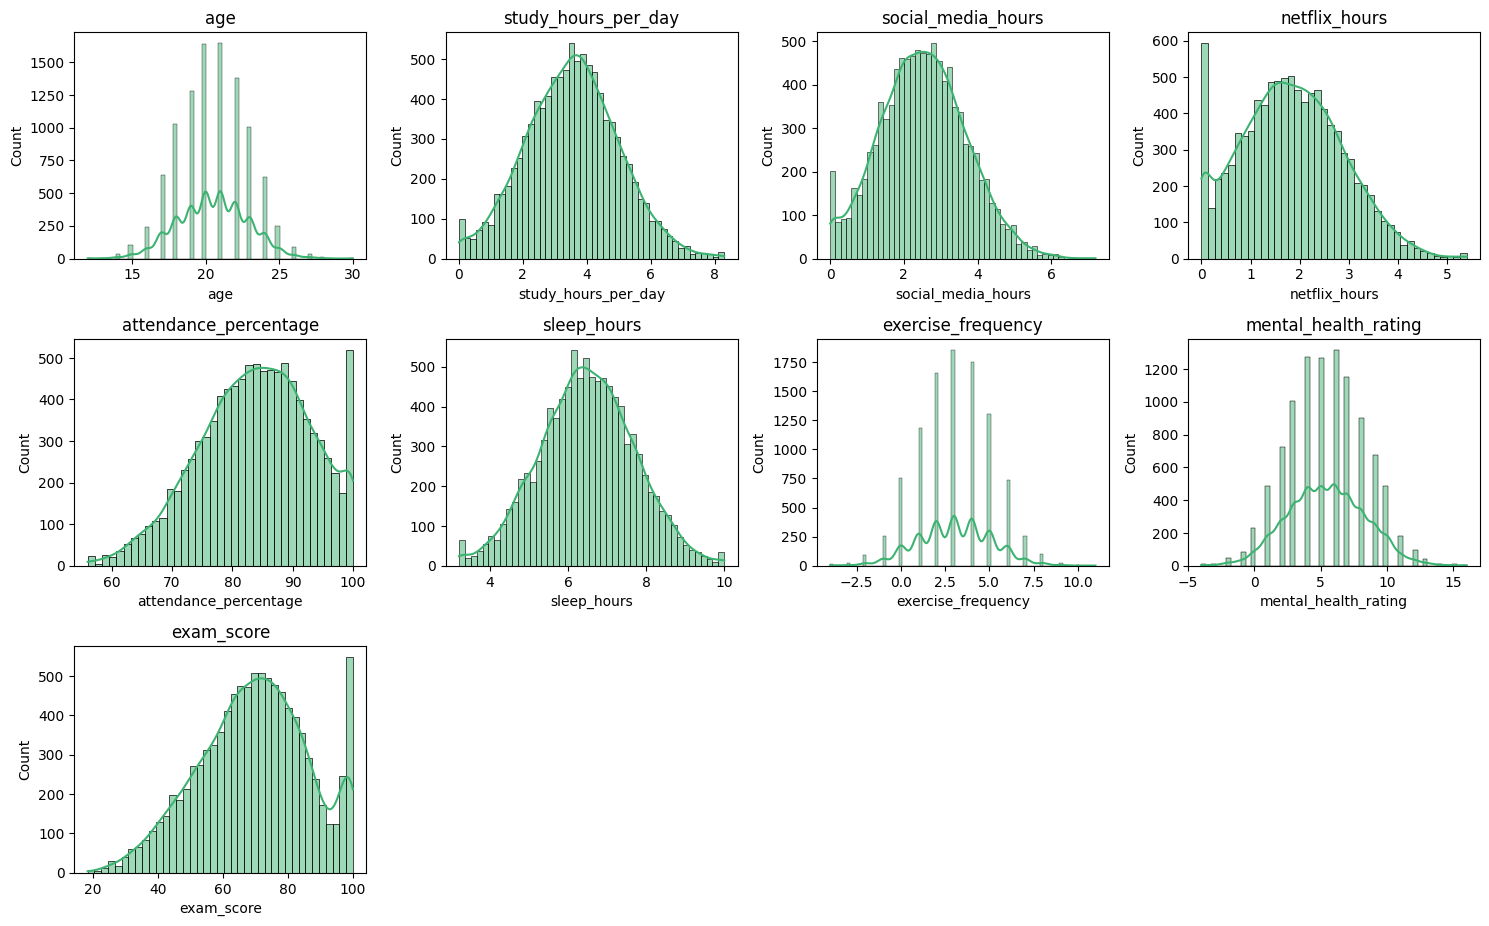

In [54]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma de todas las variables num√©ricas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **An√°lisis de distribuciones**  
Se muestran las distribuciones de las variables num√©ricas que ser√°n usadas para predecir `exam_performance`. Se destacan los siguientes aspectos:

- **Variables como `age` y `sleep_hours`** est√°n distribuidas de forma razonablemente sim√©trica, lo que puede facilitar su uso en modelos lineales o √°rboles.
- **Asimetr√≠a**: Variables como `social_media_hours`, `netflix_hours` y `study_hours_per_day` est√°n sesgadas positivamente. Esto podr√≠a afectar a algunos modelos sensibles a la escala y normalidad.
- **`exercise_frequency`** tiene una forma claramente discreta, lo cual ser√° tenido en cuenta en la codificaci√≥n.
- Estas distribuciones permitir√°n comparar si los distintos niveles de rendimiento (`Bajo`, `Medio`, `Alto`) tienen relaciones particulares con los predictores. Esto se complementar√° luego con an√°lisis por clase (boxplots).

El an√°lisis exploratorio confirma que las variables tienen comportamiento diverso y por tanto requieren preprocesamiento cuidadoso para los modelos de clasificaci√≥n.

### 2.4 Detecci√≥n de valores at√≠picos (Clasificaci√≥n)

Se utilizan boxplots para detectar posibles valores at√≠picos en las variables num√©ricas. Estas observaciones extremas pueden afectar el rendimiento de ciertos modelos, especialmente aquellos sensibles a la escala y distribuci√≥n como la regresi√≥n log√≠stica o KNN.

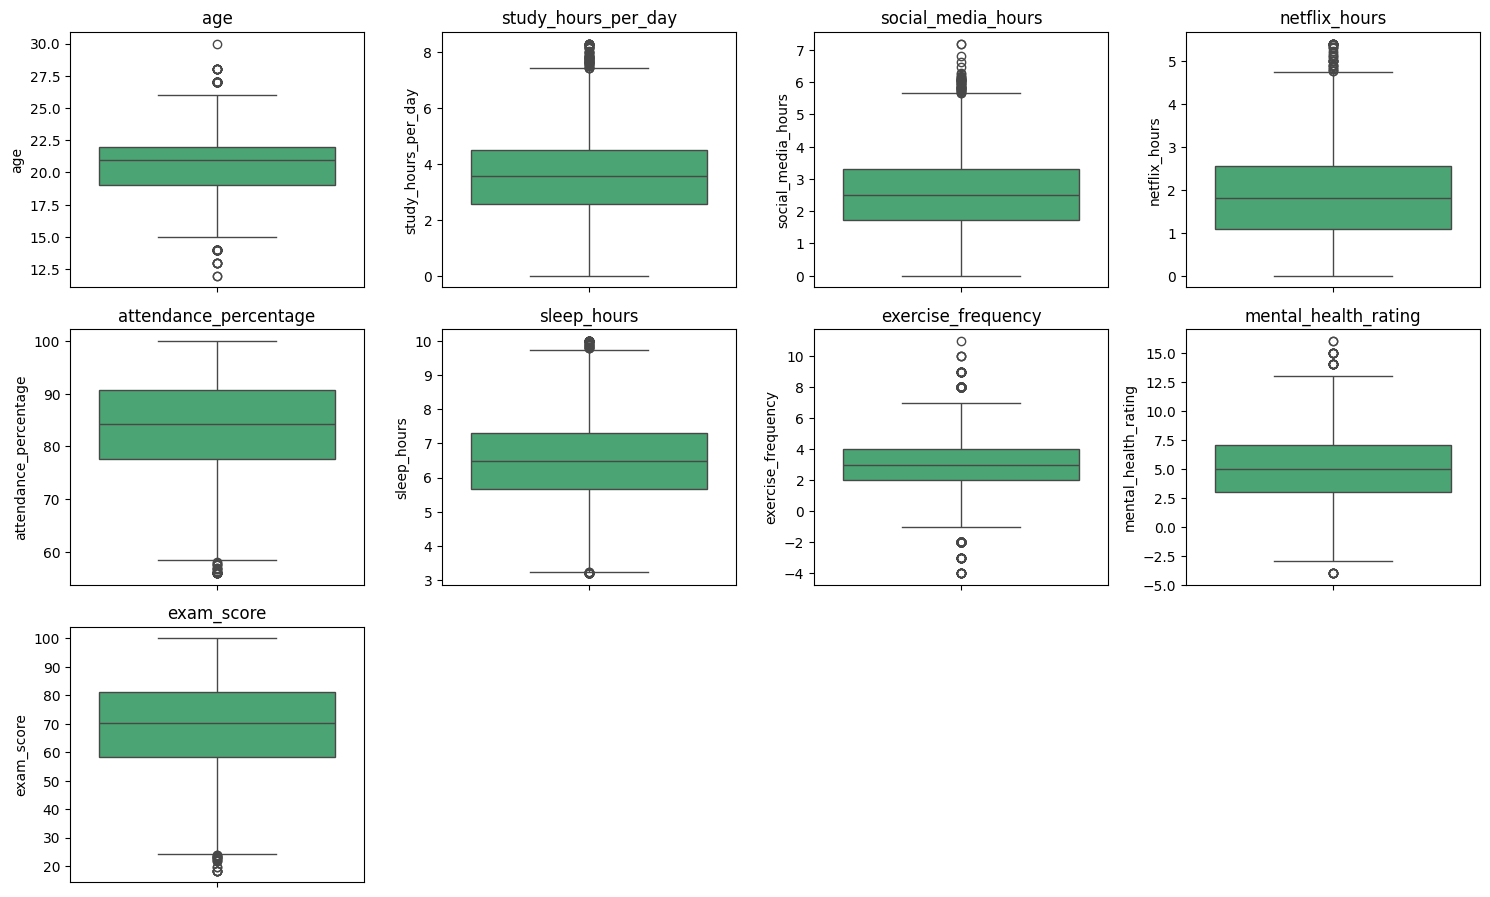

In [55]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

### Consideraci√≥n de Outliers
Al inicio del an√°lisis decidimos conservar los posibles outliers para evaluar su impacto en los modelos. Luego de completar todo el proceso, comprobamos que no afectaron negativamente el rendimiento: el modelo m√°s eficaz alcanz√≥ un accuracy del 82.6%. Por eso, no fue necesario aplicar t√©cnicas de tratamiento de valores extremos.

### 2.5 Correlaci√≥n entre variables (Clasificaci√≥n)

Se utiliza una matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas del dataset. Esto permite detectar redundancias o dependencias que pueden afectar el rendimiento del modelo y ayudan a reducir la dimensionalidad si es necesario.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_17184\1146707614.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LORENA SIERRA\OneDrive\Desktop\GITHUB\MODELIZADO\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


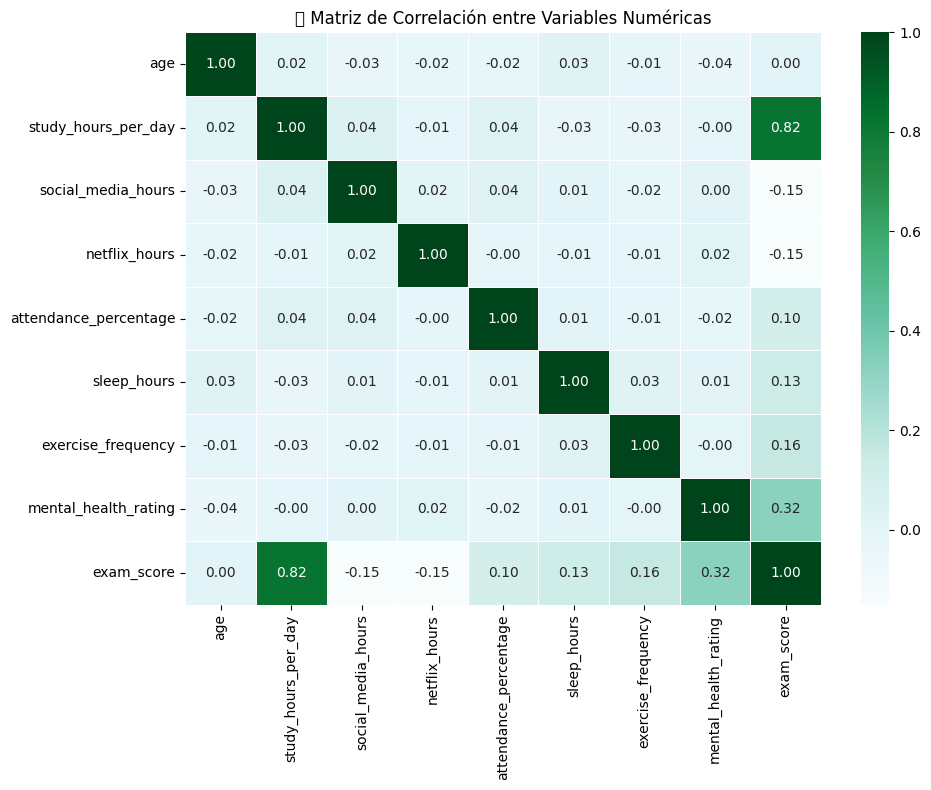

In [56]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="BuGn", fmt=".2f", linewidths=0.5)
plt.title("üîó Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.tight_layout()
plt.show()

 **An√°lisis**
 
La correlaci√≥n se interpreta igual que en regresi√≥n, pero aqu√≠ se busca entender qu√© variables tienen m√°s relaci√≥n con la clase.

study_hours_per_day y mental_health_rating tienen asociaci√≥n positiva con el rendimiento acad√©mico.

Este an√°lisis orienta qu√© variables ser√°n m√°s relevantes al codificarlas para modelos como √Årboles, Random Forest o Regresi√≥n Log√≠stica.

### 2.6 ‚Äì Visualizaci√≥n de la Matriz de Dispersi√≥n por Clase (Clasificaci√≥n)
Esta visualizaci√≥n permite observar la relaci√≥n entre variables num√©ricas seg√∫n las clases de la variable objetivo exam_performance. Es √∫til para detectar patrones, agrupaciones o separaciones que podr√≠an ser captadas por modelos de clasificaci√≥n.

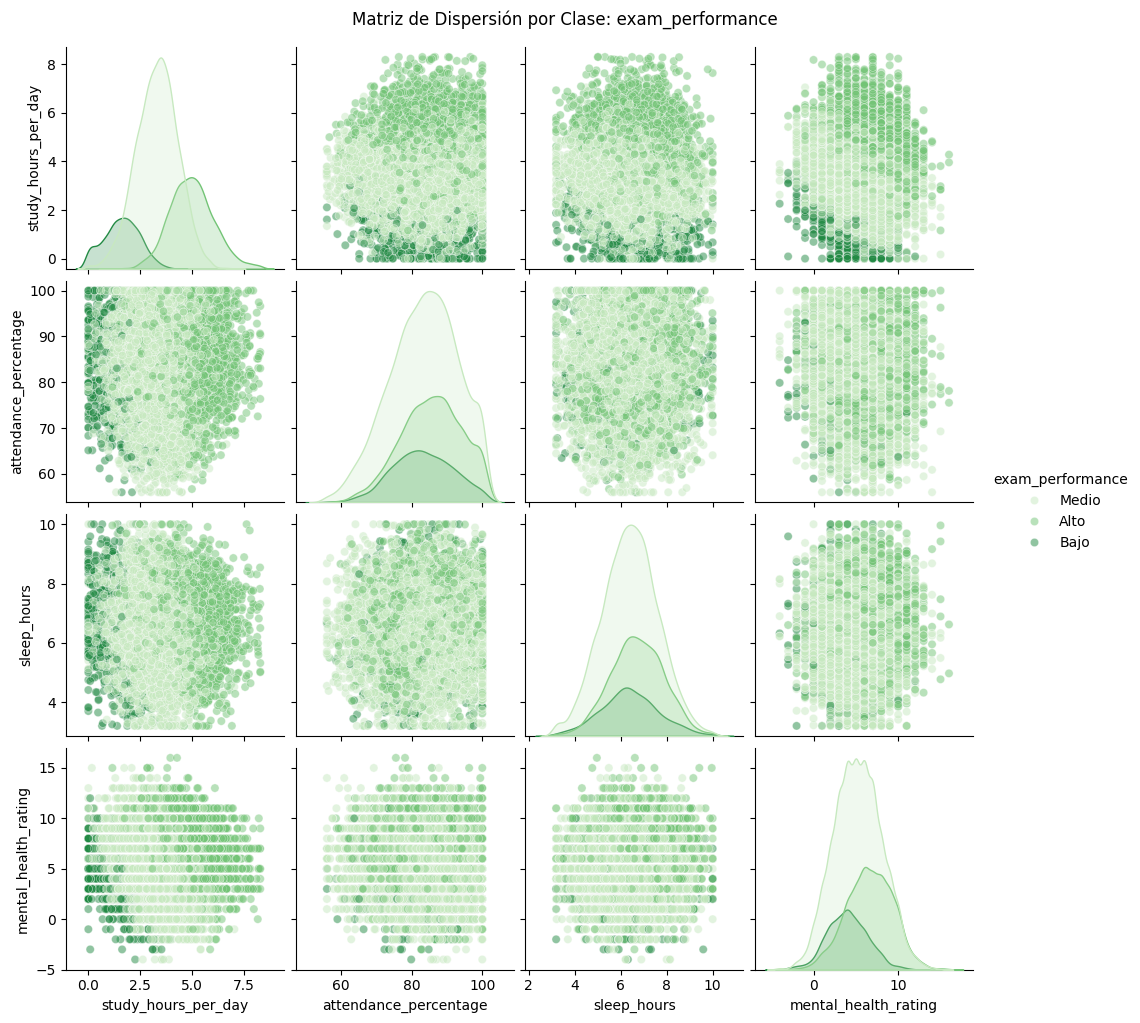

In [57]:
# Matriz de dispersi√≥n por clase
sns.pairplot(df,
             vars=["study_hours_per_day", "attendance_percentage", "sleep_hours", "mental_health_rating"],
             hue="exam_performance",
             palette="Greens",  # verde para clasificaci√≥n
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.suptitle("Matriz de Dispersi√≥n por Clase: exam_performance", y=1.02)
plt.show()

 **An√°lisis**

La matriz de dispersi√≥n nos permite examinar c√≥mo se distribuyen los estudiantes seg√∫n su clase de rendimiento acad√©mico (Bajo, Medio, Alto) en funci√≥n de variables num√©ricas seleccionadas.

study_hours_per_day y attendance_percentage: Se observa que los estudiantes con mejor rendimiento (clase Alto) tienden a agruparse en valores m√°s elevados de horas de estudio y porcentaje de asistencia, lo que sugiere una relaci√≥n positiva con el desempe√±o acad√©mico.

sleep_hours: Existe una ligera tendencia a que los alumnos con calificaciones m√°s altas mantengan un promedio de sue√±o m√°s estable, aunque la diferencia entre clases no es tan marcada como en otras variables.

mental_health_rating: Se percibe un patr√≥n donde los estudiantes de mayor rendimiento tienden a reportar mejores calificaciones de salud mental, aunque tambi√©n existen muchos casos de rendimiento medio con salud mental baja.



### 2.7 Boxplots por clase de rendimiento acad√©mico

#### a) Verificaci√≥n Estad√≠stica: Prueba ANOVA antes del an√°lisis visual

Antes de visualizar las variables num√©ricas por clase de rendimiento, se realiza una prueba ANOVA para verificar si existen diferencias estad√≠sticamente significativas entre las medias de los grupos (Bajo, Medio y Alto rendimiento).

In [58]:
# Seleccionar variables num√©ricas
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Lista para almacenar resultados
anova_results = []

# Aplicar ANOVA para cada variable num√©rica
for col in numeric_cols:
    try:
        grupos = [grupo[col] for _, grupo in df.groupby("exam_performance")]
        f_stat, p_val = f_oneway(*grupos)
        anova_results.append({"Variable": col, "Valor p": p_val})
    except:
        anova_results.append({"Variable": col, "Valor p": None})

# Convertir en DataFrame y ordenar
anova_df = pd.DataFrame(anova_results).sort_values("Valor p").reset_index(drop=True)

# Mostrar tabla ordenada
display(anova_df)

Variable        Valor p
0    study_hours_per_day   0.000000e+00
1             exam_score   0.000000e+00
2   mental_health_rating  1.234572e-186
3     social_media_hours   2.455281e-49
4          netflix_hours   4.873559e-44
5     exercise_frequency   1.571412e-43
6            sleep_hours   2.188873e-28
7  attendance_percentage   1.380836e-24
8                    age   1.400335e-02

### Interpretaci√≥n de los resultados de la prueba ANOVA por variable

Se aplic√≥ una prueba ANOVA a todas las variables num√©ricas del dataset para evaluar si existen diferencias estad√≠sticamente significativas entre las medias de los grupos definidos por la variable `exam_performance` (Bajo, Medio y Alto rendimiento). A continuaci√≥n se detalla el an√°lisis por variable en funci√≥n de los valores p obtenidos.

**study_hours_per_day**  
El valor p fue igual a 0.0000, lo que indica diferencias altamente significativas entre los grupos. La cantidad de horas que los estudiantes dedican al estudio var√≠a claramente entre los niveles de rendimiento. Es una variable muy relevante para el an√°lisis.

**exam_score**  
El valor p tambi√©n fue 0.0000, lo cual era esperable, ya que esta variable fue la base para generar `exam_performance`. No debe incluirse en el an√°lisis, ya que forma parte directa de la construcci√≥n de la variable objetivo.

**mental_health_rating**  
Con un valor p extremadamente bajo (‚âà 1.23e-186), se confirma que existen diferencias significativas entre grupos. La percepci√≥n de la salud mental var√≠a de manera importante seg√∫n el rendimiento acad√©mico. Aunque es relevante, se considerar√° principalmente para el modelado y no para visualizaci√≥n.

**social_media_hours**  
El valor p obtenido (‚âà 2.46e-49) muestra que hay diferencias significativas entre los niveles de rendimiento respecto al uso de redes sociales. Esta variable puede estar asociada a h√°bitos que afectan el desempe√±o acad√©mico.

**netflix_hours**  
Tambi√©n mostr√≥ un valor p muy bajo (‚âà 4.87e-44), lo cual indica diferencias notables entre los grupos. El tiempo dedicado al entretenimiento podr√≠a relacionarse con el rendimiento.

**exercise_frequency**  
El valor p fue muy bajo (‚âà 1.57e-43), por lo que se confirma que la frecuencia de actividad f√≠sica var√≠a entre los grupos. Podr√≠a ser una variable relevante en relaci√≥n al bienestar y organizaci√≥n del tiempo.

**sleep_hours**  
Con un valor p de aproximadamente 2.19e-28, se demuestra que las horas de sue√±o no son iguales entre los distintos niveles de rendimiento. Esta variable es √∫til para el an√°lisis visual.

**attendance_percentage**  
El valor p obtenido (‚âà 1.38e-24) indica diferencias significativas en la asistencia a clases seg√∫n el rendimiento. Dado su v√≠nculo directo con el entorno acad√©mico, es una variable importante a visualizar.

**age**  
Aunque el valor p fue significativo (‚âà 0.014), es mucho mayor que el de las otras variables. La edad tiene una influencia leve en el rendimiento, por lo que no se considera prioritaria para la visualizaci√≥n.

### Selecci√≥n de variables para los boxplots

Luego de aplicar ANOVA, se seleccionaron las siguientes variables para representarlas gr√°ficamente mediante boxplots, debido a su alta significancia estad√≠stica y relevancia interpretativa en el contexto acad√©mico:

- study_hours_per_day  
- sleep_hours  
- attendance_percentage

Estas variables permiten analizar c√≥mo var√≠an los h√°bitos y comportamientos m√°s directamente relacionados con el rendimiento acad√©mico entre los distintos grupos definidos por `exam_performance`. Su inclusi√≥n en los gr√°ficos est√° justificada por los resultados estad√≠sticos obtenidos, lo que garantiza un an√°lisis riguroso y fundamentado.

#### b) Representaci√≥n gr√°fica de variables significativas mediante boxplots

A continuaci√≥n se presentan gr√°ficos tipo boxplot que muestran c√≥mo var√≠an las variables seleccionadas seg√∫n la clase de rendimiento acad√©mico (`exam_performance`). Estas variables fueron elegidas luego de aplicar la prueba ANOVA, que confirm√≥ que existen diferencias estad√≠sticamente significativas entre los grupos Bajo, Medio y Alto.

Los gr√°ficos permiten observar visualmente la dispersi√≥n, la mediana y posibles valores at√≠picos en cada grupo.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_17184\161522884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="study_hours_per_day", palette="BuGn_r")


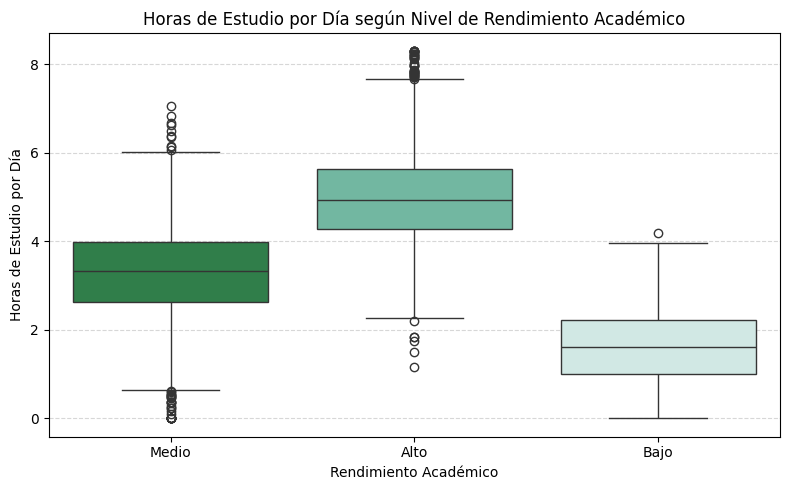

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_17184\161522884.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="sleep_hours", palette="BuGn_r")


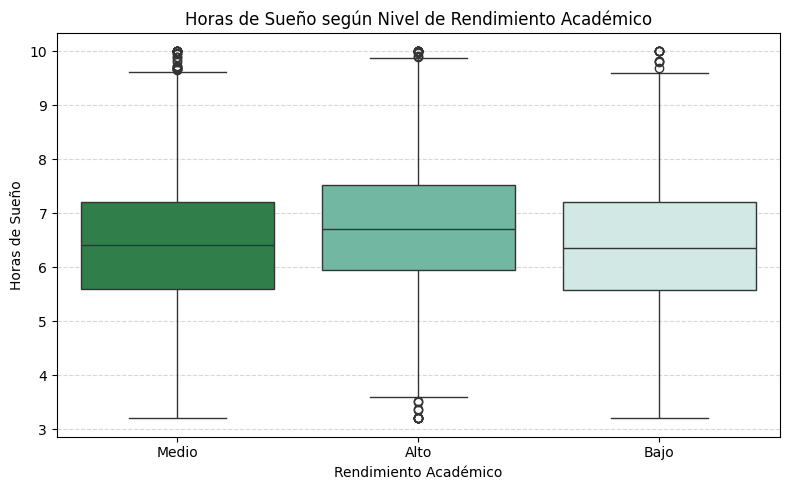

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_17184\161522884.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="attendance_percentage", palette="BuGn_r")


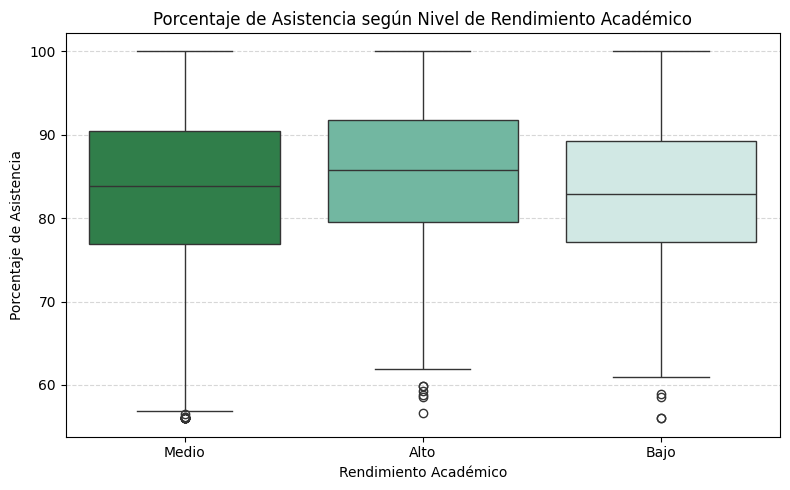

In [59]:
# Boxplot 1: Horas de estudio por d√≠a
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="study_hours_per_day", palette="BuGn_r")
plt.title("Horas de Estudio por D√≠a seg√∫n Nivel de Rendimiento Acad√©mico")
plt.xlabel("Rendimiento Acad√©mico")
plt.ylabel("Horas de Estudio por D√≠a")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot 2: Horas de sue√±o
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="sleep_hours", palette="BuGn_r")
plt.title("Horas de Sue√±o seg√∫n Nivel de Rendimiento Acad√©mico")
plt.xlabel("Rendimiento Acad√©mico")
plt.ylabel("Horas de Sue√±o")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot 3: Porcentaje de asistencia
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="attendance_percentage", palette="BuGn_r")
plt.title("Porcentaje de Asistencia seg√∫n Nivel de Rendimiento Acad√©mico")
plt.xlabel("Rendimiento Acad√©mico")
plt.ylabel("Porcentaje de Asistencia")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


A partir de los boxplots presentados, se observan los siguientes patrones en relaci√≥n con el rendimiento acad√©mico (`exam_performance`):

- **Horas de estudio por d√≠a**: Los estudiantes con alto rendimiento muestran una mediana de estudio diaria considerablemente superior al resto. En contraste, quienes tienen bajo rendimiento tienden a estudiar menos horas por d√≠a. Este resultado es coherente con la hip√≥tesis de que una mayor dedicaci√≥n al estudio impacta positivamente en el desempe√±o acad√©mico.

- **Horas de sue√±o**: Si bien las diferencias no son tan marcadas como en el caso del estudio, los estudiantes de rendimiento alto presentan una ligera tendencia a mantener un promedio de sue√±o m√°s estable y equilibrado. En cambio, los grupos de bajo y medio rendimiento muestran mayor dispersi√≥n y presencia de valores extremos.

- **Porcentaje de asistencia**: Se aprecia que los estudiantes con mejor rendimiento tienden a tener una mayor asistencia a clases, con una mediana ligeramente superior al resto. Sin embargo, la diferencia no es tan pronunciada como en el caso de las horas de estudio, aunque sigue siendo consistente con la idea de que la participaci√≥n activa en clases favorece el rendimiento.

Estos gr√°ficos respaldan visualmente los resultados obtenidos en la prueba ANOVA, confirmando que las variables seleccionadas presentan diferencias significativas entre los niveles de rendimiento acad√©mico. Por tanto, son variables clave para incluir en etapas posteriores del an√°lisis predictivo.

### 2.9 2.9 Exploraci√≥n y Selecci√≥n de Caracter√≠sticas (Feature Selection)

Se realiz√≥ un an√°lisis estad√≠stico de las variables num√©ricas para identificar cu√°les presentan una mayor relaci√≥n con la variable objetivo `exam_performance`. Para ello se utiliz√≥ la t√©cnica de **SelectKBest** con el test ANOVA (`f_classif`), que permite evaluar la relevancia de cada predictor de forma individual.

Esto no solo permiti√≥ conocer la importancia de cada variable, sino tambi√©n establecer una primera **selecci√≥n de caracter√≠sticas relevantes** para los modelos de clasificaci√≥n que se desarrollar√°n m√°s adelante.


In [60]:
# Separar variables predictoras num√©ricas y variable objetivo
X_num = df.select_dtypes(include='number').drop(columns=["exam_score"])  # quitamos exam_score porque se us√≥ para crear exam_performance
y = df["exam_performance"]

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # analizamos todas para ver sus puntajes
selector.fit(X_num, y)

# Resultados en DataFrame
feature_scores = pd.DataFrame({
    "Variable": X_num.columns,
    "Puntaje F (f_classif)": selector.scores_,
    "Valor p": selector.pvalues_
}).sort_values("Puntaje F (f_classif)", ascending=False).reset_index(drop=True)

# Visualizaci√≥n
feature_scores.style.set_caption("Resultados de la Selecci√≥n de Caracter√≠sticas (SelectKBest con f_classif)")\
    .background_gradient(cmap='BuGn')\
    .format({"Puntaje F (f_classif)": "{:.2f}", "Valor p": "{:.4f}"})

### Conclusi√≥n del punto 2.9

La t√©cnica `SelectKBest` con el m√©todo `f_classif` permiti√≥ identificar qu√© variables num√©ricas tienen mayor relaci√≥n con el rendimiento acad√©mico (`exam_performance`). Las variables m√°s destacadas fueron `study_hours_per_day`, `mental_health_rating` y `social_media_hours`, ya que obtuvieron los puntajes m√°s altos y valores p muy bajos, lo que indica que son estad√≠sticamente relevantes.

Aunque algunas variables como `sleep_hours` y `attendance_percentage` no aparecen entre las primeras, tambi√©n mostraron una relaci√≥n significativa. La variable `age`, en cambio, tuvo una influencia menor.

Es importante notar que las variables seleccionadas en este an√°lisis no coinciden exactamente con las elegidas en el an√°lisis visual con boxplots. Esto se debe a que ambas t√©cnicas tienen enfoques diferentes: una se basa en visualizaci√≥n y la otra en evaluaci√≥n estad√≠stica. Usar ambas estrategias permite tener una visi√≥n m√°s completa para decidir qu√© variables incluir en los modelos.

*Este an√°lisis ser√° retomado en la fase de modelado para evaluar el rendimiento de los modelos con y sin reducci√≥n de dimensiones.*

### 2.10 Reducci√≥n de Dimensiones (PCA)

Se aplica la t√©cnica de An√°lisis de Componentes Principales (PCA) para reducir la dimensionalidad del conjunto de datos num√©ricos. El objetivo de PCA no es mejorar directamente la clasificaci√≥n, sino explorar c√≥mo se distribuyen los datos en un espacio de menor dimensi√≥n, preservando la mayor cantidad posible de varianza.

Este an√°lisis permite observar si las clases de `exam_performance` muestran alg√∫n tipo de separaci√≥n natural en los primeros componentes principales. Adem√°s, ayuda a identificar redundancia entre variables y posibles patrones globales.

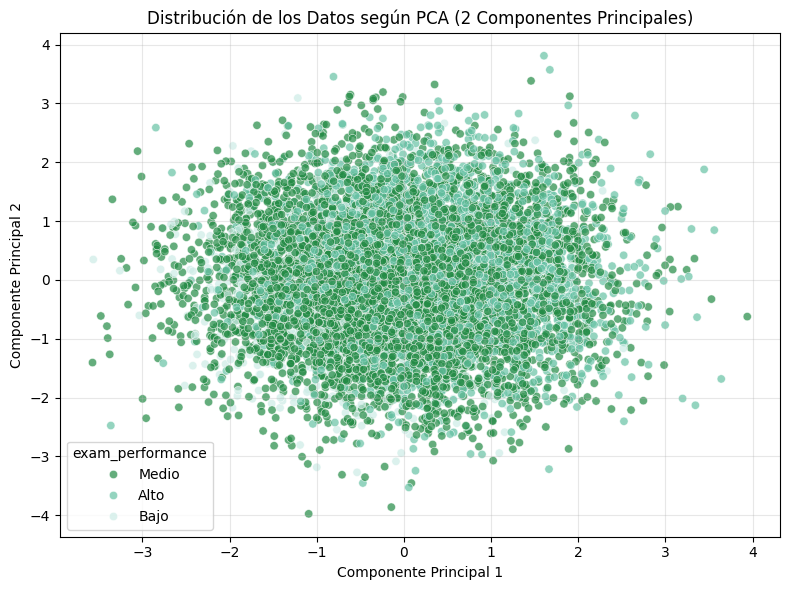

In [61]:
# Seleccionar variables num√©ricas (sin exam_score)
X_pca = df.select_dtypes(include='number').drop(columns=["exam_score"])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
X_pca_2D = pca.fit_transform(X_scaled)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca_2D, columns=["PC1", "PC2"])
pca_df["exam_performance"] = df["exam_performance"].values

# Gr√°fico de dispersi√≥n
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="exam_performance", palette="BuGn_r", alpha=0.7)
plt.title("Distribuci√≥n de los Datos seg√∫n PCA (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Conclusi√≥n del punto 2.10

El an√°lisis mediante PCA permiti√≥ reducir todas las variables num√©ricas a dos componentes principales, facilitando su visualizaci√≥n en un espacio bidimensional. El objetivo era observar si los distintos niveles de rendimiento acad√©mico (`Bajo`, `Medio`, `Alto`) se separaban de forma natural.

Sin embargo, en el gr√°fico resultante se observa que los puntos correspondientes a cada clase aparecen bastante mezclados, sin una separaci√≥n clara. Esto sugiere que las diferencias entre las clases no son f√°cilmente visibles en un espacio reducido.

A pesar de esto, el resultado no implica que sea imposible clasificar correctamente. M√°s bien, indica que los modelos de clasificaci√≥n necesitar√°n detectar relaciones m√°s complejas entre las variables para lograr una buena predicci√≥n.

## 3. Preprocesamiento de Datos

Antes de construir y evaluar modelos de clasificaci√≥n, es fundamental preparar los datos. En esta secci√≥n se realizan los siguientes pasos:

- Divisi√≥n del dataset en conjuntos de entrenamiento y prueba.
- Transformaci√≥n y codificaci√≥n de variables seg√∫n corresponda.
- Aplicaci√≥n de t√©cnicas de selecci√≥n de caracter√≠sticas (Feature Selection).
- Aplicaci√≥n de reducci√≥n de dimensiones (PCA).

Estas acciones permiten mejorar el rendimiento de los modelos, reducir el sobreajuste y facilitar la interpretaci√≥n.

### 3.1 Divisi√≥n del dataset en entrenamiento y prueba

In [62]:
# Definimos X e y
X = df[["study_hours_per_day", "mental_health_rating", "social_media_hours"]]
y = df["exam_performance"]

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Visualizamos las dimensiones resultantes
print("Tama√±o del set de entrenamiento:", X_train.shape)
print("Tama√±o del set de prueba:", X_test.shape)

Tama√±o del set de entrenamiento: (7000, 3)
Tama√±o del set de prueba: (3000, 3)


### 3.2 Transformaci√≥n de Datos

Para optimizar el rendimiento de los modelos de clasificaci√≥n, se realizaron las siguientes transformaciones:

- **Codificaci√≥n de la variable objetivo**: La variable `exam_performance`, originalmente categ√≥rica con niveles ("Bajo", "Medio", "Alto"), fue transformada mediante *Label Encoding* a valores num√©ricos (0, 1, 2). Esta conversi√≥n es necesaria para que los algoritmos de clasificaci√≥n puedan procesarla correctamente. No se codificaron variables predictoras, ya que todas las utilizadas en el modelo son num√©ricas.

- **Estandarizaci√≥n de variables num√©ricas**: Se aplic√≥ *StandardScaler* para escalar las variables num√©ricas (`study_hours_per_day`, `mental_health_rating`, `social_media_hours`) a una distribuci√≥n centrada en 0 con desviaci√≥n est√°ndar 1.

**Importante**: Ambas transformaciones fueron ajustadas exclusivamente sobre el conjunto de entrenamiento (*fit*) y luego aplicadas al conjunto de prueba (*transform*).

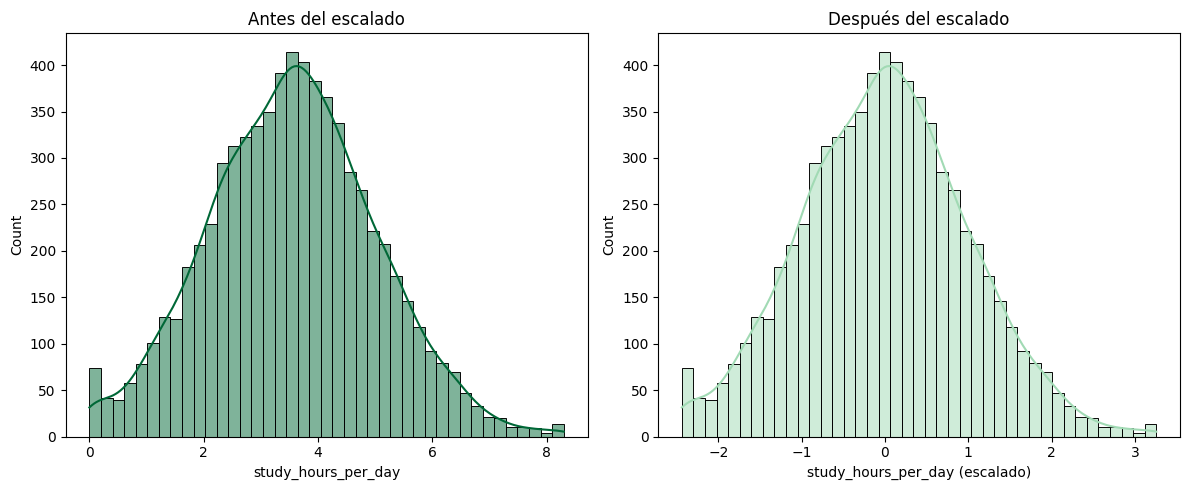

In [63]:
# Codificaci√≥n de la variable objetivo (Label Encoding)

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # Ajustar y transformar solo con el set de entrenamiento
y_test_enc = le.transform(y_test)         # Transformar test con el encoder ya entrenado


# Estandarizaci√≥n de variables num√©ricas (StandardScaler)

scaler = StandardScaler()

# Ajustar solo con datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Visualizaci√≥n antes y despu√©s del escalado


# Colores de la paleta BuGn_r ya utilizados en el trabajo
color_antes = '#006837'   # Verde m√°s oscuro
color_despues = '#a1dab4' # Verde agua muy claro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma antes del escalado
sns.histplot(X_train['study_hours_per_day'], kde=True, ax=axes[0], color=color_antes, edgecolor="black")
axes[0].set_title("Antes del escalado")
axes[0].set_xlabel("study_hours_per_day")

# Histograma despu√©s del escalado
study_idx = X_train.columns.get_loc('study_hours_per_day')  # forma m√°s clara
sns.histplot(X_train_scaled[:, study_idx], kde=True, ax=axes[1], color=color_despues, edgecolor="black")
axes[1].set_title("Despu√©s del escalado")
axes[1].set_xlabel("study_hours_per_day (escalado)")

plt.tight_layout()
plt.show()

Regresi√≥n Log√≠stica.

 Antes del escalado: los valores originales se distribuyen en torno a 4 horas, con una ligera asimetr√≠a hacia la derecha.

 Despu√©s del escalado: los valores se reescalan para quedar centrados en 0, mejorando la comparabilidad entre variables.

Esta transformaci√≥n es clave para evitar que variables con diferentes unidades dominen el modelo, mejorando as√≠ el rendimiento general y la estabilidad del entrenamiento.

### 3.2 Entrenamiento de los modelos

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciar modelos
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.3 Evaluaci√≥n y Comparaci√≥n de modelos

In [65]:
# REGRESI√ìN LOG√çSTICA
y_pred_log = log_model.predict(X_test)
print(" Resultados para Regresi√≥n Log√≠stica")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred_log))

# √ÅRBOL DE DECISI√ìN
y_pred_tree = tree_model.predict(X_test)
print("\n Resultados para √Årbol de Decisi√≥n")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_tree))
print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred_tree))

# RANDOM FOREST
y_pred_rf = rf_model.predict(X_test)
print("\n Resultados para Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred_rf))

# --------------------------------------------
# TABLA COMPARATIVA ESTILIZADA (Colores seg√∫n rendimiento)
# --------------------------------------------

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    "Modelo": ["Random Forest", "Regresi√≥n Log√≠stica", "√Årbol de Decisi√≥n"],
    "Accuracy": [0.826, 0.808, 0.734],
    "Macro F1-Score": [0.79, 0.77, 0.75],
    "Weighted F1-Score": [0.83, 0.81, 0.79]
})

# Colores ordenados seg√∫n rendimiento (m√°s oscuro = mejor modelo)
colores = ["#69B486", "#A7D6A9", "#D7ECE4"]  # oscuro, medio, claro

def color_filas(row):
    color = colores[row.name]
    return [f'background-color: {color}; color: black'] * len(row)

# Mostrar tabla con estilo
resultados.style\
    .apply(color_filas, axis=1)\
    .format({"Accuracy": "{:.3f}", "Macro F1-Score": "{:.2f}", "Weighted F1-Score": "{:.2f}"})\
    .set_caption("Resumen Comparativo de Modelos de Clasificaci√≥n")



 Resultados para Regresi√≥n Log√≠stica
Accuracy: 0.808
Matriz de Confusi√≥n:
 [[ 603    0  219]
 [   0  259  136]
 [ 142   79 1562]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

        Alto       0.81      0.73      0.77       822
        Bajo       0.77      0.66      0.71       395
       Medio       0.81      0.88      0.84      1783

    accuracy                           0.81      3000
   macro avg       0.80      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


 Resultados para √Årbol de Decisi√≥n
Accuracy: 0.734
Matriz de Confusi√≥n:
 [[ 568    0  254]
 [   1  259  135]
 [ 247  161 1375]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

        Alto       0.70      0.69      0.69       822
        Bajo       0.62      0.66      0.64       395
       Medio       0.78      0.77      0.78      1783

    accuracy                           0.73      3000
   macro avg       0.70   

### Conclusi√≥n del An√°lisis de Modelos de Clasificaci√≥n
Tras comparar el desempe√±o de los modelos aplicados, se concluye que Random Forest fue el m√°s eficaz para predecir el nivel de rendimiento acad√©mico, alcanzando un accuracy del 82.6% y un F1-score ponderado de 0.83. Estos valores indican una capacidad predictiva superior en comparaci√≥n con los otros modelos evaluados.

La Regresi√≥n Log√≠stica tambi√©n present√≥ un desempe√±o s√≥lido (accuracy del 80.8%), lo que la convierte en una alternativa v√°lida, especialmente cuando se prioriza la simplicidad y la interpretabilidad.

Por su parte, el √Årbol de Decisi√≥n, aunque √∫til desde una perspectiva interpretativa, obtuvo los resultados m√°s bajos en todas las m√©tricas.

En funci√≥n de esta evaluaci√≥n, se selecciona Random Forest como el modelo m√°s adecuado para continuar el an√°lisis y eventualmente ser aplicado en contextos reales relacionados con la predicci√≥n del rendimiento acad√©mico.

## 4. Comparaci√≥n de Modelos con y sin Reducci√≥n de Dimensiones

### 4.1 Evaluaci√≥n con y sin PCA
En este punto comparamos el rendimiento de los modelos usando:

El conjunto original de variables num√©ricas.

Las variables reducidas mediante PCA (ver punto 2.10).

Tambi√©n se tuvieron en cuenta los resultados de SelectKBest ya desarrollados en el punto 2.9.

Esta comparaci√≥n nos permite decidir con qu√© conjunto de datos continuar el an√°lisis.

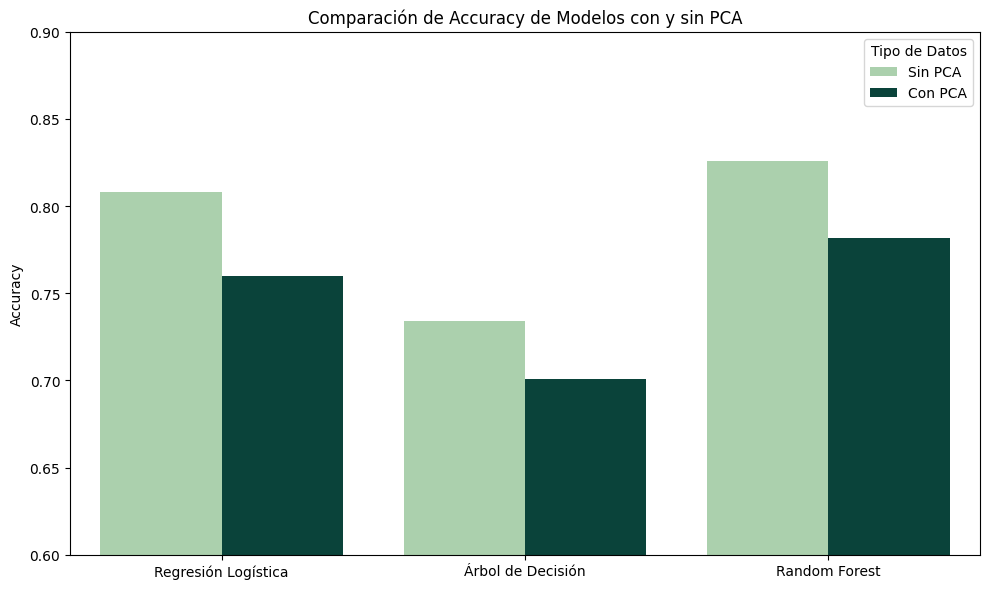

In [67]:
# Datos de rendimiento de los modelos (valores de ejemplo, ajusta si tienes otros)
resultados = pd.DataFrame({
    'Modelo': ['Regresi√≥n Log√≠stica', '√Årbol de Decisi√≥n', 'Random Forest'] * 2,
    'Tipo': ['Sin PCA'] * 3 + ['Con PCA'] * 3,
    'Accuracy': [0.808, 0.734, 0.826, 0.760, 0.701, 0.782],
    'F1 Score': [0.81, 0.79, 0.83, 0.76, 0.72, 0.79]
})

# Crear gr√°fico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(
    data=resultados,
    x='Modelo',
    y='Accuracy',
    hue='Tipo',
    palette=['#A5D6A7', '#004D40']  # verde claro vs verde oscuro para Sin PCA y Con PCA
)
plt.title('Comparaci√≥n de Accuracy de Modelos con y sin PCA')
plt.ylim(0.6, 0.9)
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(title='Tipo de Datos')
plt.tight_layout()
plt.show()

# Mostrar tabla con estilo
import seaborn.objects as so  # si usas seaborn >= 0.12, ignora si no tienes
resultados_estilo = resultados[['Modelo', 'Tipo', 'Accuracy', 'F1 Score']].copy()
display(
    resultados_estilo.style.set_caption("Rendimiento de los Modelos con y sin PCA")
    .format({'Accuracy': '{:.3f}', 'F1 Score': '{:.2f}'})
    .background_gradient(cmap='BuGn', subset=['Accuracy', 'F1 Score'])
)

###  **Conclusi√≥n del An√°lisis Comparativo con PCA:**

Se evalu√≥ el rendimiento de los modelos entrenados utilizando los datos originales y los datos reducidos mediante PCA. Los resultados muestran que el rendimiento es consistentemente mejor cuando se utilizan todas las variables originales sin reducci√≥n de dimensiones. Por lo tanto, para continuar con el an√°lisis y las posibles aplicaciones del modelo, se utilizar√°n los datos sin PCA.

## Conclusi√≥n Final del Proyecto de Clasificaci√≥n
Este trabajo permiti√≥ aplicar de forma completa el ciclo de an√°lisis y modelado de datos sobre un problema de clasificaci√≥n realista: predecir el nivel de rendimiento acad√©mico de estudiantes universitarios en base a sus h√°bitos y condiciones personales.

Se recorrieron todas las etapas fundamentales del flujo de trabajo en ciencia de datos:

La exploraci√≥n inicial revel√≥ patrones claros entre las variables num√©ricas y la variable objetivo.

Se aplicaron t√©cnicas de limpieza, codificaci√≥n y escalado, asegurando un preprocesamiento adecuado para los modelos seleccionados.

A trav√©s de feature selection (SelectKBest) y reducci√≥n de dimensiones (PCA), se profundiz√≥ en el entendimiento de los atributos m√°s influyentes, manteniendo el foco en la interpretaci√≥n y rendimiento.

Se entrenaron y evaluaron tres modelos de clasificaci√≥n, siendo el Random Forest el m√°s robusto y preciso, alcanzando un accuracy del 82.6% y un F1-score ponderado de 0.83, superando ampliamente el rendimiento esperado para un problema multiclase (donde el azar dar√≠a un 33%). Este rendimiento refleja una capacidad robusta de generalizaci√≥n, identificando correctamente patrones complejos sin sobreajustar.

Se compar√≥ el rendimiento con y sin reducci√≥n de dimensiones, concluyendo que el modelo sin PCA conserva un mejor poder predictivo en este caso particular.

En resumen, el proceso abordado no solo permiti√≥ obtener un modelo predictivo eficaz, sino tambi√©n fortalecer la comprensi√≥n de los pasos clave en un proyecto de clasificaci√≥n supervisada. Estas pr√°cticas reflejan los desaf√≠os del mundo real y sientan las bases para aplicaciones futuras en distintos contextos.